<a href="https://colab.research.google.com/github/junyeog/machine-learning-practice/blob/main/250402_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

## k-최근접 이웃의 한계

In [84]:
import numpy as np

# 농어의 길이 데이터
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

# 농어의 무게 데이터
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [85]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 구분
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 2차원 배열로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [86]:
from sklearn.neighbors import KNeighborsRegressor
#k-최근접이웃 모델 이웃 3개
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [87]:
print(knr.predict([[50]]))

[1033.33333333]


In [88]:
import matplotlib.pyplot as plt

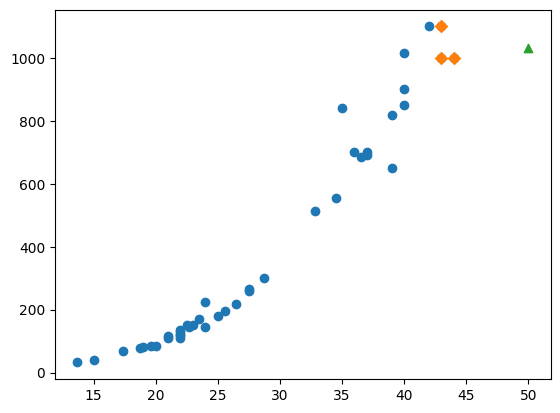

In [89]:
distances, indexes = knr.kneighbors([[50]])
#50cm 농어와 이웃 3개 보여주는 산점도
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.show()

In [90]:
print(np.mean(train_target[indexes])) #타겟들의 평균

1033.3333333333333


In [91]:
print(knr.predict([[100]])) #100cm 농어도 50cm 와 똑같은 값으로 예측함

[1033.33333333]


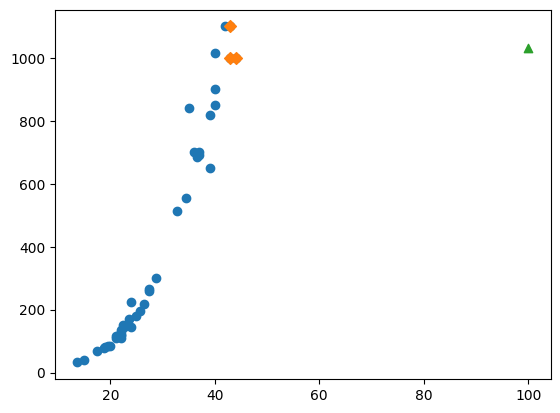

In [92]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.show()

## 선형 회귀

In [93]:
from sklearn.linear_model import LinearRegression

In [127]:
# 선형 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [121]:
print(lr.predict([[50]]))

[1241.83860323]


In [120]:
print(lr.coef_, lr.intercept_) #계수와 절편 출력

[39.01714496] -709.0186449535477


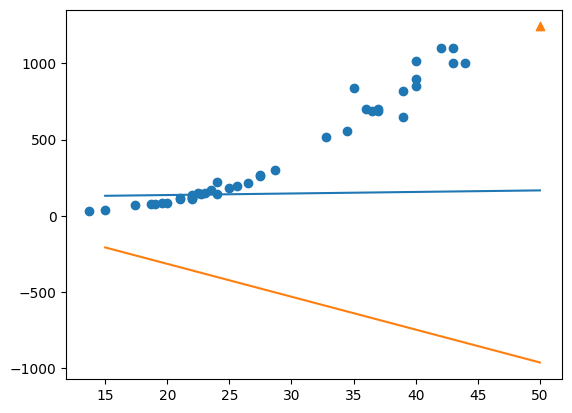

In [135]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [125]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 결과 :과소적합

0.939846333997604
0.8247503123313558


## 다항 회귀

In [99]:
# 길이 특성을 제곱해서 또 다른 특성으로 사용
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly[0:5,])
print(test_poly[0:5,])

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]


In [130]:
print(train_poly.shape, test_poly.shape) #학습 42 테스트 14 특성 두개

(42, 2) (14, 2)


In [131]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [136]:
print(lr.coef_, lr.intercept_) #계수, 절편 출력

[  1.01433211 -21.55792498] 116.0502107827827


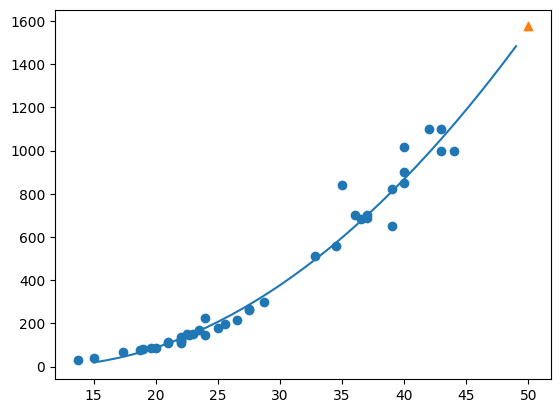

In [132]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter([50], [1574], marker='^')
plt.show()
#산점도 표현

In [133]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 결과 : 과소적합

0.9706807451768623
0.9775935108325122
